## Convolutional Neural Network

<img src='http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/11/Screen-Shot-2015-11-07-at-7.26.20-AM.png'>

In this post, you will discover how to develop and evaluate Convolutional Neural Network (CNN) deep learning models for object recognition in Keras using TensorFlow.

The problem of automatically identifying objects in photographs is difficult because of the near infinite number of permutations of objects, positions, lighting and so on. It is a well-studied problem in computer vision and more recently an important demonstration of the capability of deep learning. A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research (CIFAR).

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance.

The photos are in color with red, green and blue components, but are small measuring ``32X32`` pixel squares.

In [1]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPool2D
from keras import backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
np.random.seed(13)

Using TensorFlow backend.


In [2]:
batch_size = 32
nb_classes = 10
epochs = 10
nb_filter = 10

img_rows, img_cols = 32, 32
img_channels = 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
model = Sequential()
model.add(Conv2D(nb_filter, (3, 3), input_shape=(img_rows, img_cols, img_channels), activation='relu'))
model.add(Conv2D(nb_filter, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 10)        910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1004032   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 1,010,352
Trainable params: 1,010,352
Non-trainable params: 0
_________________________________________________________________


In [4]:
# fit the model
res = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 89s - loss: 1.5901 - acc: 0.4289 - val_loss: 1.3630 - val_acc: 0.5174
Epoch 2/10
50000/50000 [==============================] - 87s - loss: 1.2613 - acc: 0.5518 - val_loss: 1.2290 - val_acc: 0.5653
Epoch 3/10
50000/50000 [==============================] - 80s - loss: 1.1024 - acc: 0.6139 - val_loss: 1.1072 - val_acc: 0.6096
Epoch 4/10
50000/50000 [==============================] - 79s - loss: 0.9821 - acc: 0.6585 - val_loss: 1.0685 - val_acc: 0.6256
Epoch 5/10
50000/50000 [==============================] - 81s - loss: 0.8805 - acc: 0.6962 - val_loss: 1.1024 - val_acc: 0.6208
Epoch 6/10
50000/50000 [==============================] - 81s - loss: 0.7818 - acc: 0.7312 - val_loss: 1.0161 - val_acc: 0.6526
Epoch 7/10
50000/50000 [==============================] - 89s - loss: 0.6861 - acc: 0.7645 - val_loss: 1.0402 - val_acc: 0.6481
Epoch 8/10
50000/50000 [==============================

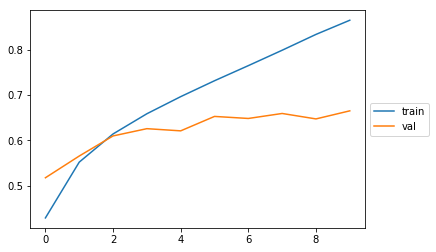

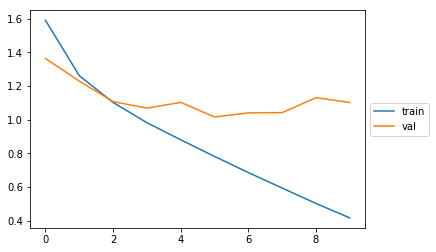

In [5]:
x = range(epochs)
plt.plot(x, res.history['acc'], label='train')
plt.plot(x, res.history['val_acc'], label='val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, res.history['loss'], label='train')
plt.plot(x, res.history['val_loss'], label='val')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [6]:
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)

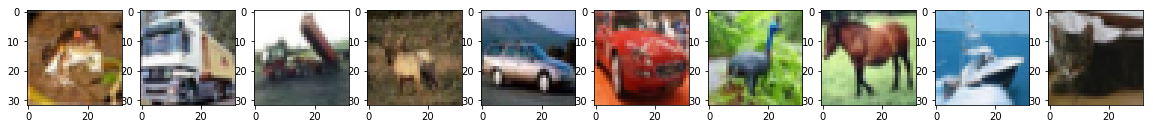

In [8]:
show_size = 10
plt.figure(figsize=(20,20))
for i in range(show_size):
    draw(X_train[i], 1, show_size, i+1)
plt.show()

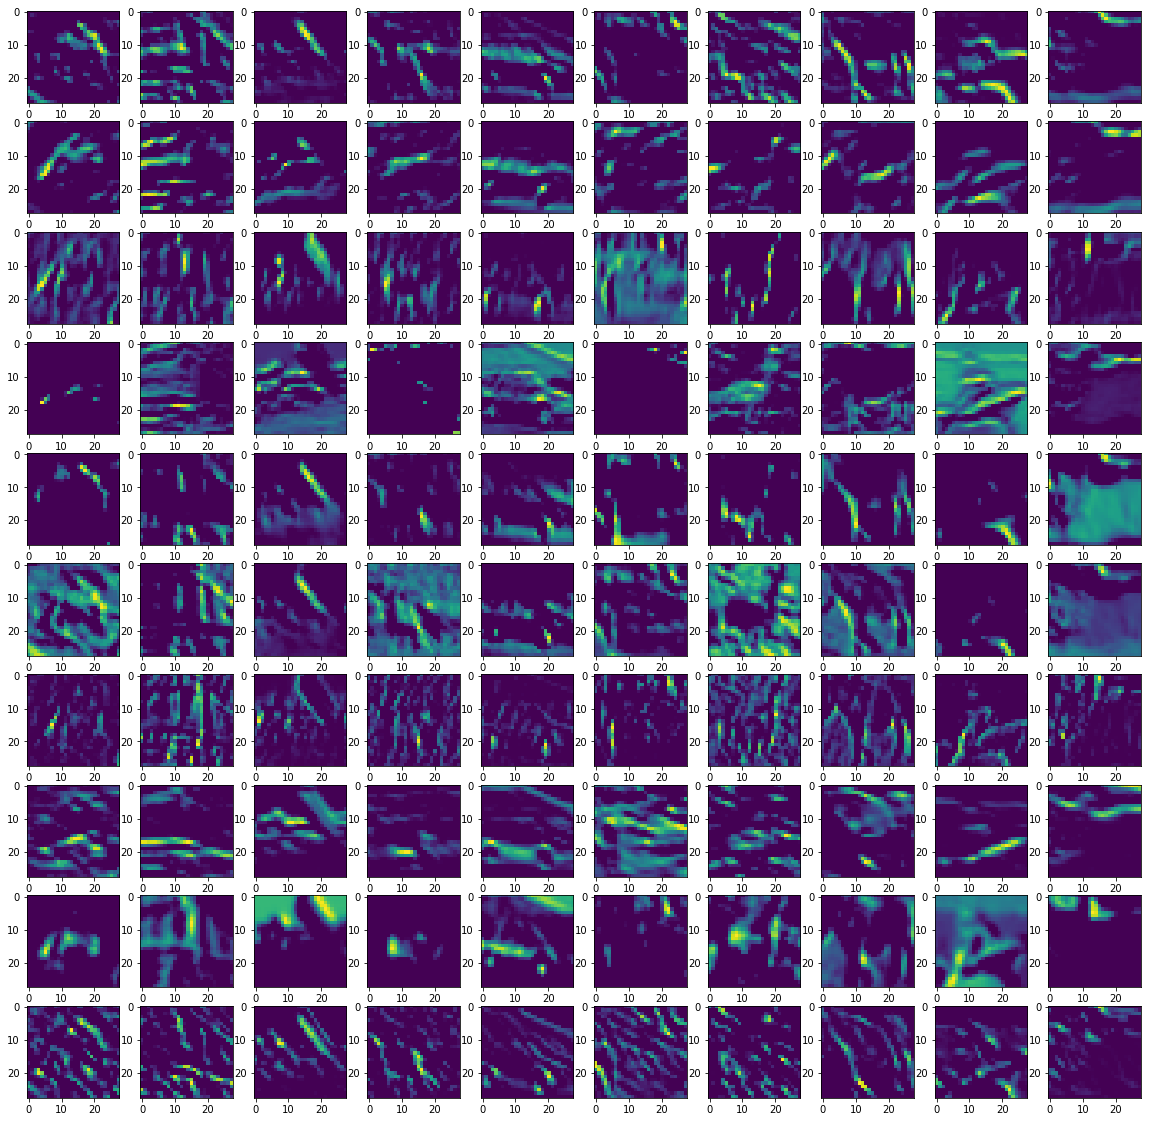

In [9]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[1].output])
layers = layer_output([X_train[0:show_size]])[0].transpose(0, 3, 1, 2)

plt.figure(figsize=(20, 20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filter, show_size, pos)
plt.show()

In [13]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
layers = layer_output([X_train[0:show_size]])[0].transpose(0, 3, 2, 1)

plt.figure(figsize=(20, 20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filter, show_size, pos)
plt.show()

ValueError: axes don't match array

In [11]:
layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
layers = layer_output([X_train[0:show_size]])[0].transpose(0, 3, 1, 2)

plt.figure(figsize=(20, 20))

for img_index, filters in enumerate(layers, start=1):
    for filter_index, mat in enumerate(filters):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filter, show_size, pos)
plt.show()

ValueError: axes don't match array